### Importação dos dados



In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [5]:
vendas_por_loja = pd.DataFrame({'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'], 'Vendas': [loja['Preço'].sum(), loja2['Preço'].sum(), loja3['Preço'].sum(), loja4['Preço'].sum()]})
vendas_por_loja

,Lojas,Vendas
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


# 2. Vendas por Categoria


In [6]:
quant_por_categ1 = loja.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade')
quant_por_categ1 = quant_por_categ1.sort_values(by='Quantidade', ascending=False)

print('Quantidade por Categorias da loja 1:')
quant_por_categ1

Quantidade por Categorias da loja 1:


,Categoria do Produto,Quantidade
6,moveis,465
2,eletronicos,448
0,brinquedos,324
1,eletrodomesticos,312
3,esporte e lazer,284
4,instrumentos musicais,182
5,livros,173
7,utilidades domesticas,171


In [7]:
quant_por_categ2 = loja2.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade')
quant_por_categ2 = quant_por_categ2.sort_values(by='Quantidade', ascending=False)
print('Quantidade por Categorias da loja 2:')
quant_por_categ2


Quantidade por Categorias da loja 2:


,Categoria do Produto,Quantidade
6,moveis,442
2,eletronicos,422
0,brinquedos,313
1,eletrodomesticos,305
3,esporte e lazer,275
4,instrumentos musicais,224
5,livros,197
7,utilidades domesticas,181


In [8]:
quant_por_categ3 = loja3.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade')
quant_por_categ3 = quant_por_categ3.sort_values(by='Quantidade', ascending=False)
print('Quantidade por Categorias da loja 3:')
quant_por_categ3

Quantidade por Categorias da loja 3:


,Categoria do Produto,Quantidade
6,moveis,499
2,eletronicos,451
0,brinquedos,315
1,eletrodomesticos,278
3,esporte e lazer,277
5,livros,185
4,instrumentos musicais,177
7,utilidades domesticas,177


In [9]:
quant_por_categ4 = loja4.groupby('Categoria do Produto')['Produto'].count().reset_index(name='Quantidade')
quant_por_categ4 = quant_por_categ4.sort_values(by='Quantidade', ascending=False)
print('Quantidade por Categorias da loja 4:')
quant_por_categ4


Quantidade por Categorias da loja 4:


,Categoria do Produto,Quantidade
6,moveis,480
2,eletronicos,451
0,brinquedos,338
3,esporte e lazer,277
1,eletrodomesticos,254
7,utilidades domesticas,201
5,livros,187
4,instrumentos musicais,170


# 3. Média de Avaliação das Lojas

In [10]:
media_nota_loja1 = float(loja['Avaliação da compra'].mean().round(2))
media_nota_loja2 = float(loja2['Avaliação da compra'].mean().round(2))
media_nota_loja3 = float(loja3['Avaliação da compra'].mean().round(2))
media_nota_loja4 = float(loja4['Avaliação da compra'].mean().round(2))

media_nota_lojas = {
    'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Notas': [media_nota_loja1, media_nota_loja2, media_nota_loja3, media_nota_loja4]
}

df = pd.DataFrame (media_nota_lojas)
df.sort_values(by= 'Notas', ascending=False)

,Lojas,Notas
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


# 4. Produtos Mais e Menos Vendidos

In [11]:
produtos_mais_loja1 = loja.groupby('Produto')['Produto'].count().sort_values(ascending=False).head(3)
produtos_mais_loja1 = produtos_mais_loja1.reset_index(name='Quantidade')
produtos_mais_loja2 = loja2.groupby('Produto')['Produto'].count().sort_values(ascending=False).head(3)
produtos_mais_loja2 = produtos_mais_loja2.reset_index(name='Quantidade')
produtos_mais_loja3 = loja3.groupby('Produto')['Produto'].count().sort_values(ascending=False).head(3)
produtos_mais_loja3 = produtos_mais_loja3.reset_index(name='Quantidade')
produtos_mais_loja4 = loja4.groupby('Produto')['Produto'].count().sort_values(ascending=False).head(3)
produtos_mais_loja4 = produtos_mais_loja4.reset_index(name='Quantidade')

produtos_mais_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], produtos_mais_loja1.columns])
produtos_mais_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], produtos_mais_loja2.columns])
produtos_mais_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], produtos_mais_loja3.columns])
produtos_mais_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], produtos_mais_loja4.columns])

mais_vendidos_juntos = pd.concat([produtos_mais_loja1, produtos_mais_loja2, produtos_mais_loja3, produtos_mais_loja4], axis=1)
print('Produtos mais vendidos:')
mais_vendidos_juntos

Produtos mais vendidos:


Loja 1                               Loja 2             \
         Produto Quantidade                   Produto Quantidade   
0  TV Led UHD 4K         60  Iniciando em programação         65   
1    Micro-ondas         60               Micro-ondas         62   
2  Guarda roupas         60                   Bateria         61   

           Loja 3                Loja 4             
          Produto Quantidade    Produto Quantidade  
0   Kit banquetas         57   Cama box         62  
1  Mesa de jantar         56   Faqueiro         59  
2       Cama king         56  Cama king         56

In [12]:
produtos_menos_loja1 = loja.groupby('Produto')['Produto'].count().sort_values(ascending=True).head(3)
produtos_menos_loja1 = produtos_menos_loja1.reset_index(name='Quantidade')
produtos_menos_loja2 = loja2.groupby('Produto')['Produto'].count().sort_values(ascending=True).head(3)
produtos_menos_loja2 = produtos_menos_loja2.reset_index(name='Quantidade')
produtos_menos_loja3 = loja3.groupby('Produto')['Produto'].count().sort_values(ascending=True).head(3)
produtos_menos_loja3 = produtos_menos_loja3.reset_index(name='Quantidade')
produtos_menos_loja4 = loja4.groupby('Produto')['Produto'].count().sort_values(ascending=True).head(3)
produtos_menos_loja4 = produtos_menos_loja4.reset_index(name='Quantidade')

produtos_menos_loja1.columns = pd.MultiIndex.from_product([['Loja 1'], produtos_menos_loja1.columns])
produtos_menos_loja2.columns = pd.MultiIndex.from_product([['Loja 2'], produtos_menos_loja2.columns])
produtos_menos_loja3.columns = pd.MultiIndex.from_product([['Loja 3'], produtos_menos_loja3.columns])
produtos_menos_loja4.columns = pd.MultiIndex.from_product([['Loja 4'], produtos_menos_loja4.columns])

menos_vendidos_juntos = pd.concat([produtos_menos_loja1, produtos_menos_loja2, produtos_menos_loja3, produtos_menos_loja4], axis=1)
print('Produtos menos vendidos:')
menos_vendidos_juntos

Produtos menos vendidos:


Loja 1                        Loja 2             \
             Produto Quantidade            Produto Quantidade   
0       Celular ABXY         33  Jogo de tabuleiro         32   
1            Headset         33         Impressora         34   
2  Panela de pressão         35     Mesa de jantar         34   

             Loja 3                    Loja 4             
            Produto Quantidade        Produto Quantidade  
0  Blocos de montar         35       Guitarra         33  
1     Jogo de copos         36  Guarda roupas         34  
2       Micro-ondas         36         Violão         37

# 5. Frete Médio por Loja


In [13]:
frete_medio_total = pd.DataFrame(
                                {'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
                                 'Frete Médio': [loja['Frete'].mean().round(2),
                                                 loja2['Frete'].mean().round(2),
                                                 loja3['Frete'].mean().round(2),
                                                 loja4['Frete'].mean().round(2)]})

frete_medio_total.sort_values(by='Frete Médio', ascending=False)

,Lojas,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


# Analise gráfica


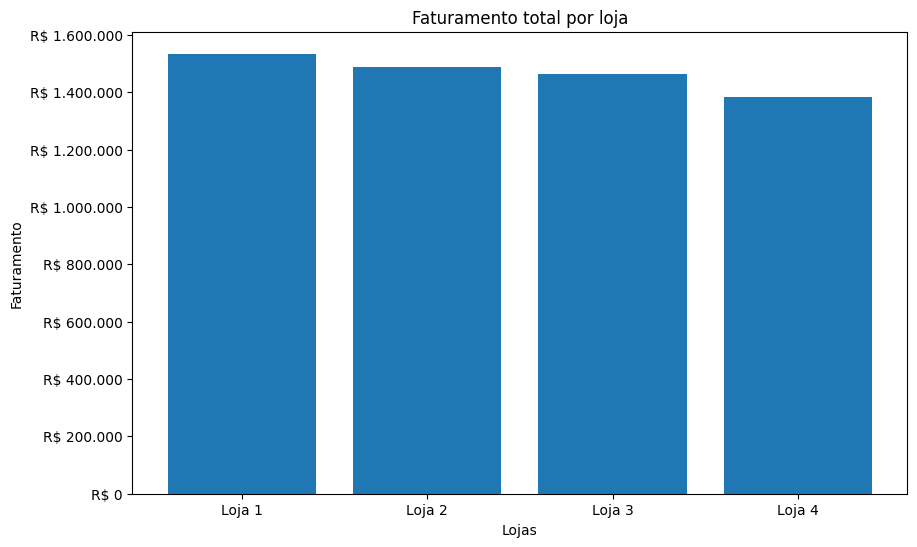

In [18]:
from matplotlib.ticker import FuncFormatter

# Função para formatar como moeda
def formatar_moeda(valor, pos):
    return f'R$ {valor:,.0f}'.replace(',', '.')

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.bar(vendas_por_loja['Lojas'], vendas_por_loja['Vendas'])
plt.title('Faturamento total por loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')


# Aplicar formatação no eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_moeda))

plt.show()

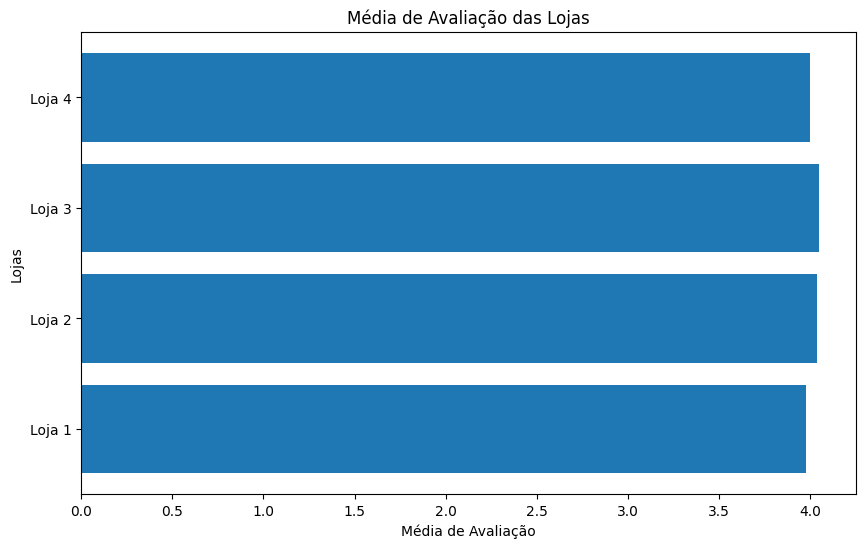

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(df['Lojas'], df['Notas'])
plt.title('Média de Avaliação das Lojas')
plt.xlabel('Média de Avaliação')
plt.ylabel('Lojas')
plt.show()

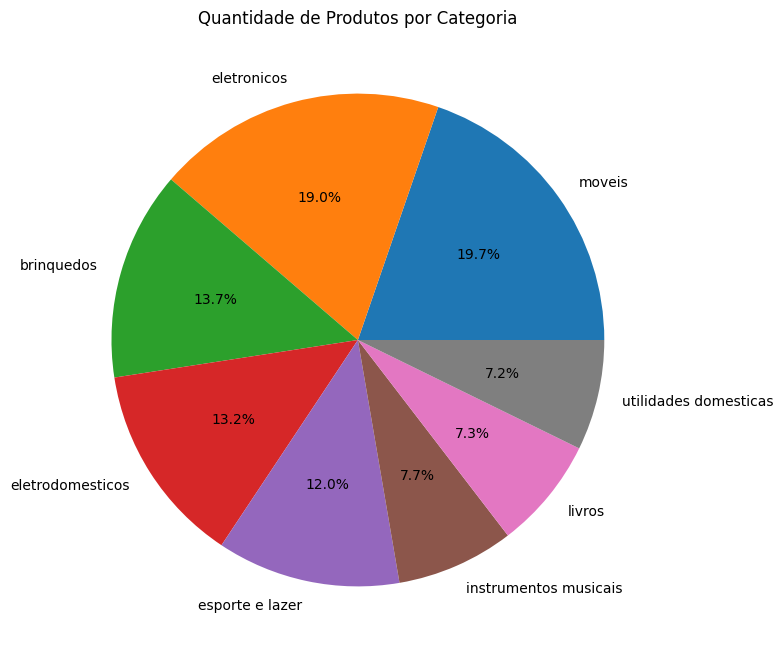

In [16]:
plt.figure(figsize=(10, 8))
plt.pie(quant_por_categ1['Quantidade'], labels=quant_por_categ1['Categoria do Produto'], autopct='%1.1f%%')
plt.title('Quantidade de Produtos por Categoria')
plt.show()

# 📊 Relatório Final — Análise para Decisão de Venda de Loja

## 1. Introdução

Este relatório visa apoiar o Senhor João na decisão de qual loja da rede **Alura Store** deve ser vendida. A análise foi baseada em critérios quantitativos e qualitativos, incluindo:

- Faturamento total  
- Categorias de produtos mais e menos vendidos  
- Média de avaliações dos clientes  
- Produtos mais e menos vendidos  
- Frete médio por loja  

Com base nos dados analisados, apresentamos as principais descobertas e a recomendação final.

---

## 2. Análises Realizadas

### 💰 Faturamento Total por Loja

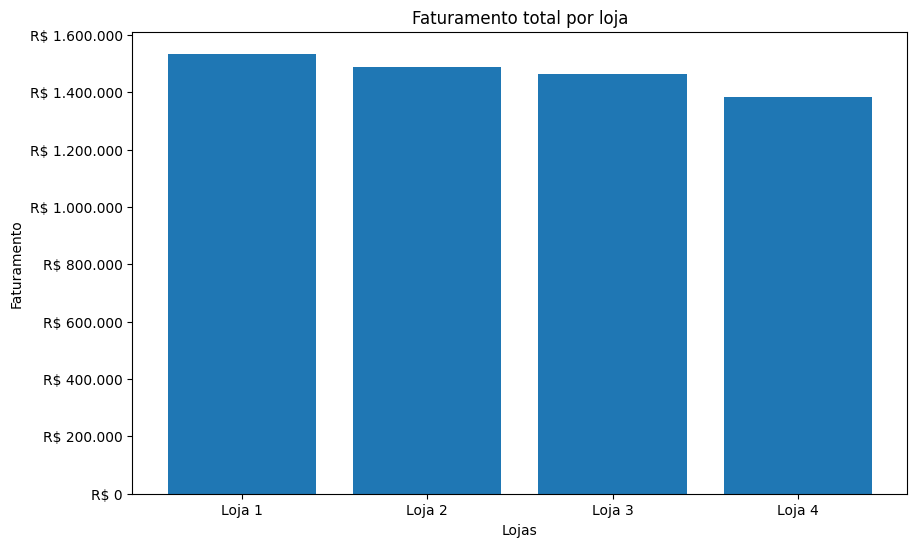

| Loja   | Faturamento Total (R$) |
|--------|------------------------|
| Loja 1 | 1.534.509,12 ✅        |
| Loja 2 | 1.488.459,06           |
| Loja 3 | 1.464.025,03           |
| Loja 4 | 1.384.497,58 ❌        |

➡️ A **Loja 1** teve o maior faturamento, e a **Loja 4** o menor.

---

### 📚 Categorias Mais Vendidas

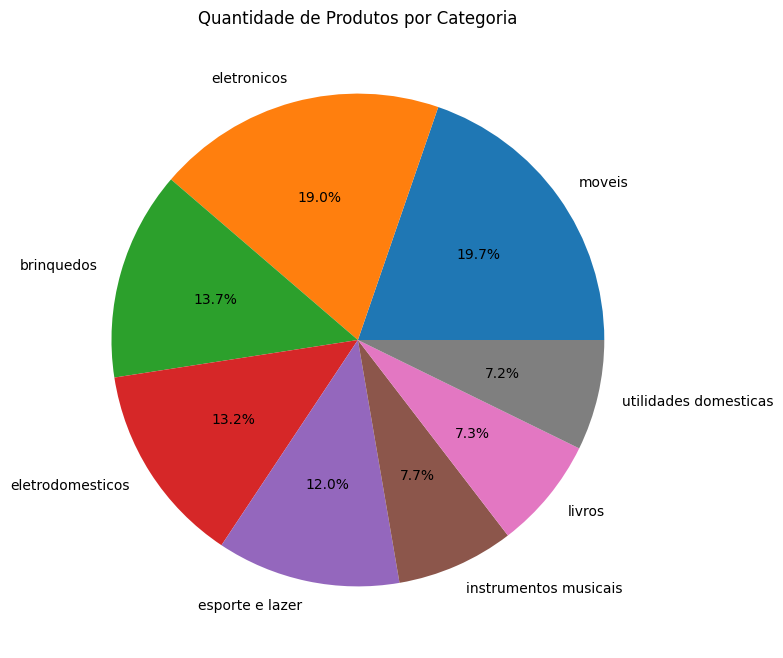

As categorias com maior volume de vendas em todas as lojas foram:
- Móveis  
- Eletrônicos  
- Brinquedos  

➡️ A **Loja 4** não lidera em nenhuma dessas categorias, o que enfraquece seu desempenho geral.

---

### 📚 Categorias Menos Vendidas

As categorias com menor volume de vendas em todas as lojas foram:
- Utilidades domésticas  
- Livros  
- Instrumentos musicais  

➡️ A **Loja 4** teve destaque negativo em categorias como **instrumentos musicais** (guitarra, violão), reforçando a baixa atratividade e baixa rotatividade dos seus produtos.

---

### ⭐ Média de Avaliação dos Clientes

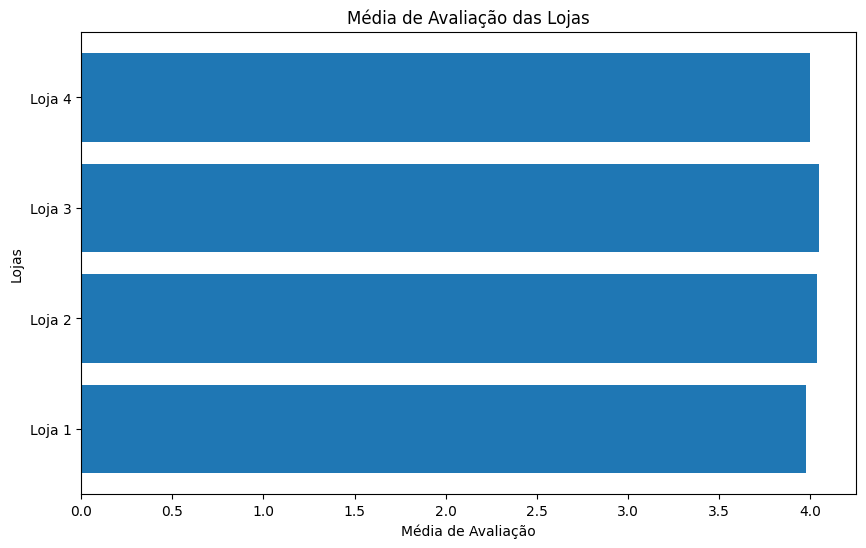

| Loja   | Nota Média |
|--------|------------|
| Loja 1 | 3.98 ❌     |
| Loja 2 | 4.04       |
| Loja 3 | 4.05 ✅     |
| Loja 4 | 4.00       |


➡️ A **Loja 3** apresenta a melhor avaliação. A **Loja 1** tem o menor índice de satisfação.

---

### 📦 Produtos Mais Vendidos

**Loja 1:**
- TV Led UHD 4K (60)
- Micro-ondas (60)
- Guarda-roupas (60)

**Loja 2:**
- Iniciando em programação (65)
- Micro-ondas (62)
- Bateria (61)

**Loja 3:**
- Kit banquetas (57)
- Mesa de jantar (56)
- Cama king (56)

**Loja 4:**
- Cama box (62)
- Faqueiro (59)
- Cama king (56)

➡️ As **Lojas 2, 3 e 4** têm boas vendas em produtos populares. A **Loja 1** mostra equilíbrio, mas seus produtos são menos variados.

---

### 📉 Produtos Menos Vendidos

**Loja 1:**
- Celular ABXY (33)
- Headset (33)
- Panela de pressão (35)

**Loja 2:**
- Jogo de tabuleiro (32)
- Impressora (34)
- Mesa de jantar (35)

**Loja 3:**
- Blocos de montar (35)
- Jogo de copos (36)
- Micro-ondas (36)

**Loja 4:**
- Guitarra (33)
- Guarda-roupas (34)
- Violão (37)

➡️ A **Loja 4** se destaca negativamente com produtos de nicho (guitarra, violão) entre os menos vendidos, o que sugere baixa demanda.

---

### 🚚 Frete Médio por Loja

| Loja   | Frete Médio (R$) |
|--------|------------------|
| Loja 1 | 34,69 ❌          |
| Loja 2 | 33,62            |
| Loja 3 | 33,07            |
| Loja 4 | 31,28 ✅          |

➡️ A **Loja 4** possui o menor custo médio de frete.

---

## 3. Conclusão e Recomendação

Com base nos dados analisados:

- A **Loja 1** lidera em faturamento, mas tem a pior avaliação e o frete mais caro.  
- A **Loja 2** apresenta bom equilíbrio entre desempenho e avaliação.  
- A **Loja 3** é a mais bem avaliada pelos clientes e possui bom desempenho em vendas.  
- A **Loja 4** tem o menor faturamento, não se destaca em categorias estratégicas, possui produtos de baixa demanda e se destaca negativamente em categorias menos populares — mesmo com o menor custo de frete.

---

### ✅ Recomendação Final

**Recomenda-se a venda da Loja 4.**

Apesar de ter o menor frete médio, a **Loja 4** apresenta o pior desempenho geral. Seu faturamento é o mais baixo, não possui destaque em categorias de maior venda, tem avaliação inferior às demais lojas e muitos produtos com baixa saída, especialmente em categorias pouco procuradas.

A venda da Loja 4 permitirá ao Senhor João focar os recursos e estratégias nas lojas mais fortes, maximizando o retorno financeiro e a satisfação dos clientes.

---
